About this file
Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Import data from github with the help of READ_CSV method. We have to predict the rings of each abalone which will lead us to teh age of that abalone.

# Exploratory Data Analysis

In [3]:
df.shape

(4177, 9)

There are 4177 rows and 9 columns in our data.

In [4]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

All collumns are numerical except Sex column.

In [5]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

Name of the columns are given above and there are 9 columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


With help of df.info() we can get information about data for example: Columns Name, Number of rows, and Null value and data type like as Object, int, float and as we are getting there is only one object type column.

# Summary Statistics

In [7]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Statistical Summary provide information about whole data statistically i.e. Count, Mean, Standard Deviation, Minimum value, 25%, 50% 75% and Maximum Value and statistical report is mentioned above.

In [8]:
df.Rings.unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

Unique values of Rings column.

In [9]:
df.Rings.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

Count qunique value with the help of above mentioned command.

# Visualization

<AxesSubplot:>

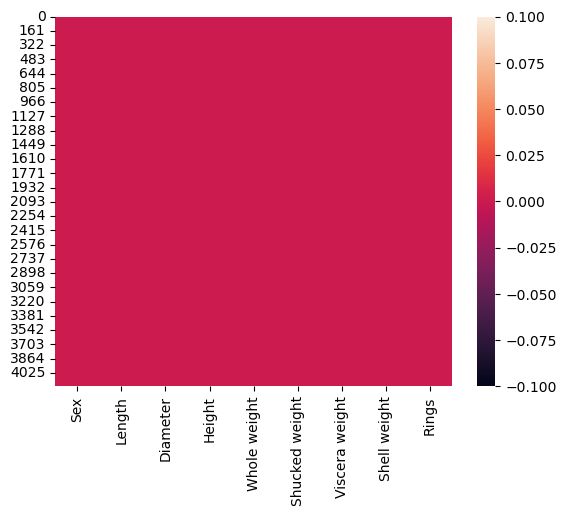

In [10]:
sns.heatmap(df.isnull())

with the help of heatmap we are getting there is no missing value in our data.

# Correlation

In [11]:
dfcor=df.corr()
dfcor

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

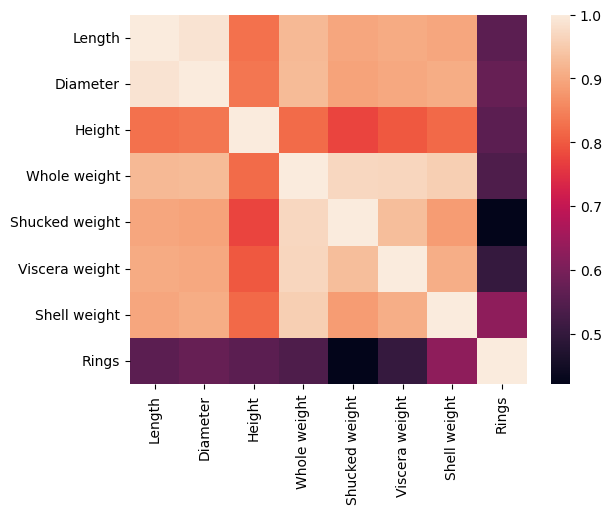

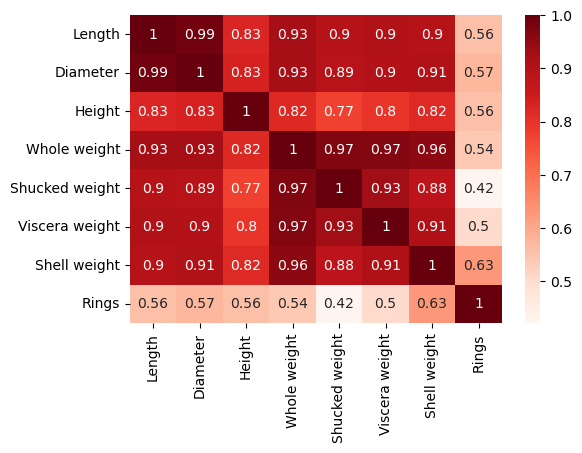

In [12]:
import matplotlib.pyplot as plt
sns.heatmap(dfcor)
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Reds', annot=True)

With the help of correlation, we can find relation between variables and we are getting all columns have good relation.

# Univariate Analysis

# Ploting Outliers by Box Plot

<AxesSubplot:>

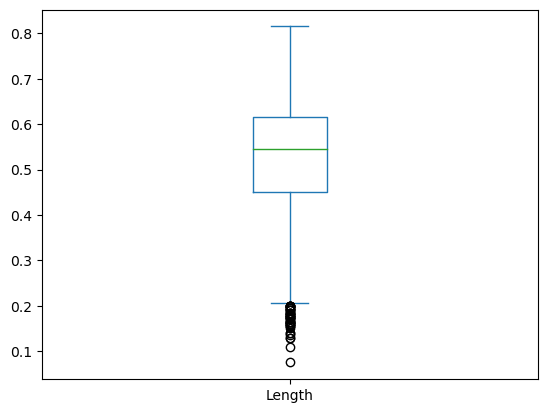

In [13]:
df['Length'].plot.box()

Outliers are present in Length column.

<AxesSubplot:>

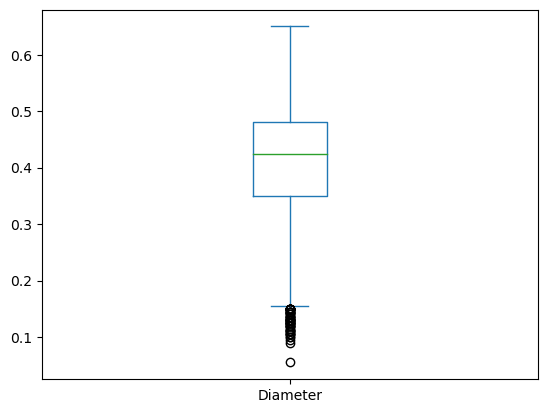

In [14]:
df['Diameter'].plot.box()

Outliers are present in Diameter column

<AxesSubplot:>

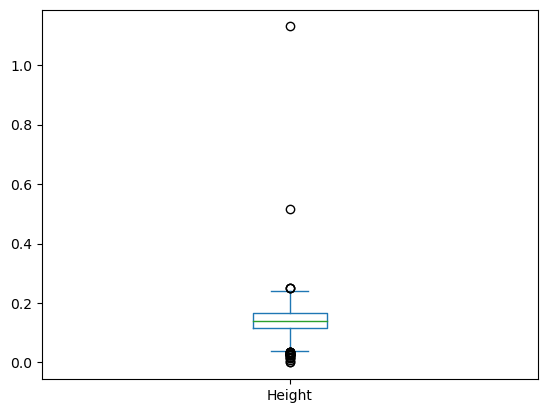

In [15]:
df['Height'].plot.box()

Ploting outliers with the help of boxplot.

<AxesSubplot:>

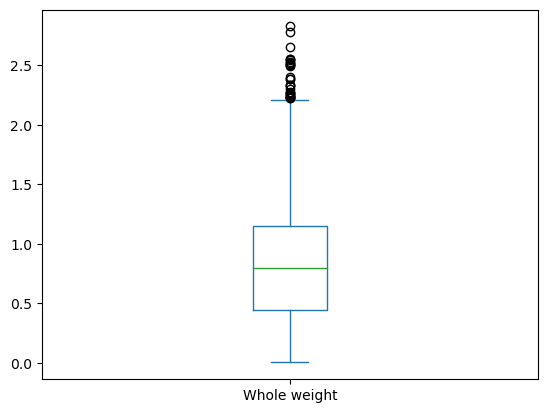

In [16]:
df['Whole weight'].plot.box()

Ploting Outliers with the help of boxplot and outliers are present in Whole weight column.

<AxesSubplot:>

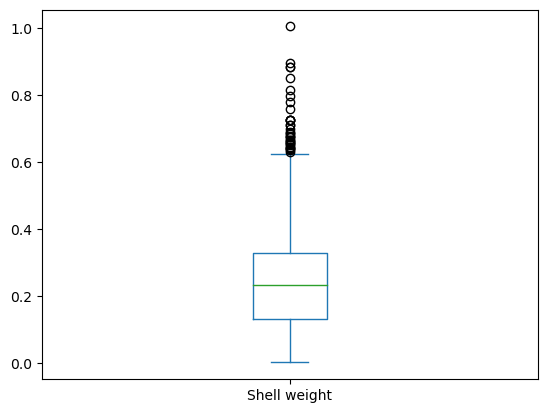

In [17]:
df['Shell weight'].plot.box()

Outliers are present in shell weight column.

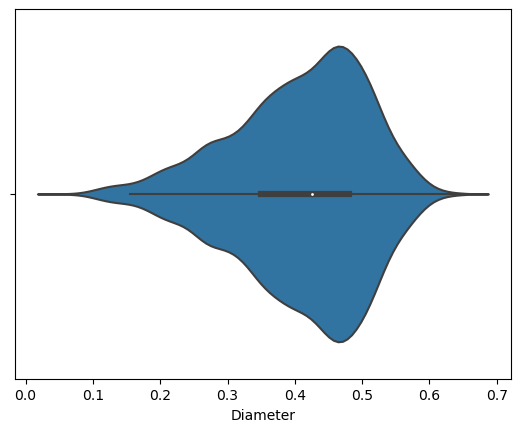

In [18]:
sns.violinplot(x='Diameter',data=df)
plt.show()

Maximum data is distributed between 3 to 5.5.

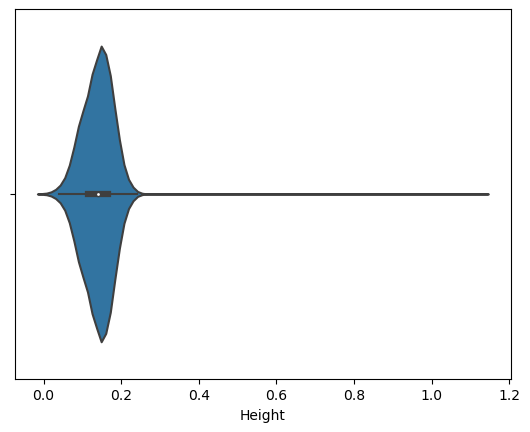

In [19]:
sns.violinplot(x='Height',data=df)
plt.show()

Ploting Height column with the help of violinplot and maximum data is on 2 scale.

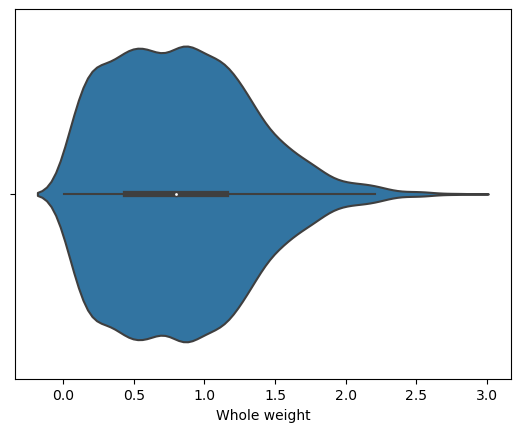

In [20]:
sns.violinplot(x='Whole weight',data=df)
plt.show()

According to above violinplot data normally distributed.

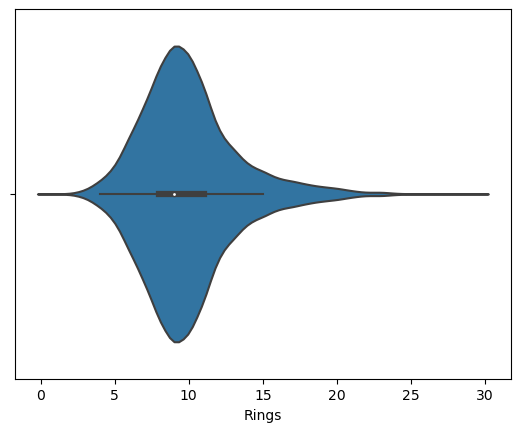

In [21]:
sns.violinplot(x='Rings',data=df)
plt.show()

Ploting Target with the help of violinplot and maximum abalone have 10 rings.

# Bivariate Analysis

<AxesSubplot:xlabel='Whole weight', ylabel='Shucked weight'>

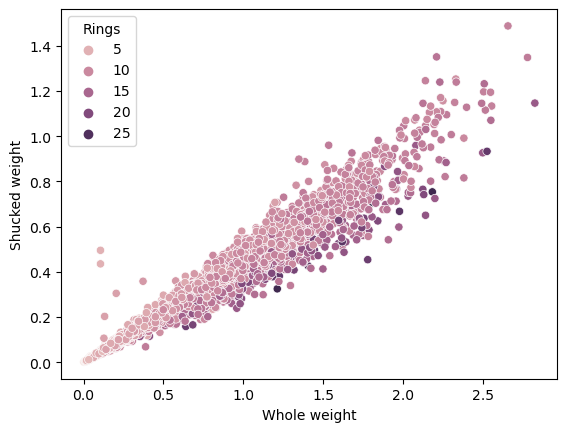

In [22]:
sns.scatterplot(data=df, x="Whole weight", y="Shucked weight", hue="Rings")

According to given plot both columns are increasing.

<AxesSubplot:xlabel='Length', ylabel='Diameter'>

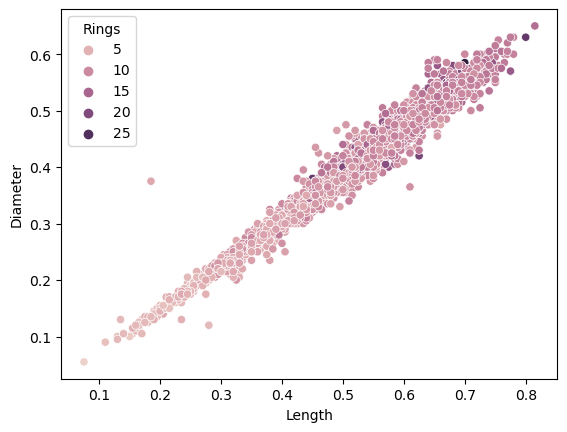

In [23]:
sns.scatterplot(data=df, x="Length", y="Diameter", hue="Rings")

According to given plot both columns are increasing.

<AxesSubplot:xlabel='Viscera weight', ylabel='Shell weight'>

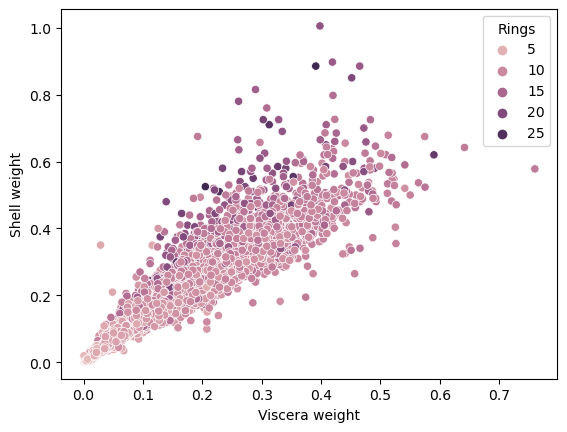

In [24]:
sns.scatterplot(data=df, x="Viscera weight", y="Shell weight", hue="Rings")

According to plot the maximum data is present on high scale.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


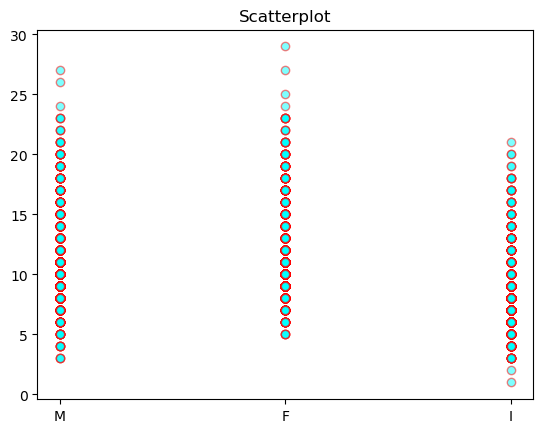

In [25]:
plt.scatter(df['Sex'],df['Rings'],alpha=0.5,c=(0,1,1),edgecolors='r')
plt.title('Scatterplot')
plt.show()

With help of scatterplot ploting target variable.

# Multivariate Analysis

In [26]:
collist=df.columns.values
ncol=12
nrows=10

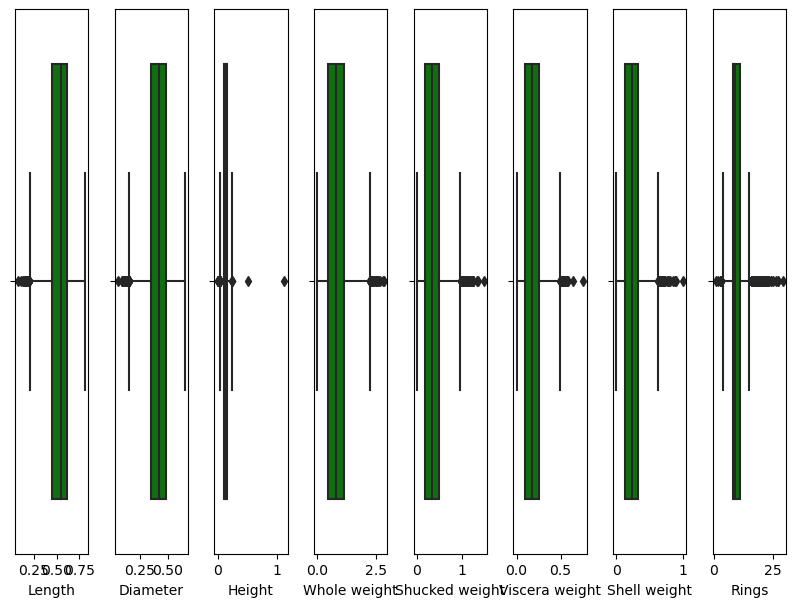

In [27]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green', orient='v')
    plt.tight_layout()

Ploting all columns by Boxplot to find outliers in a one place.

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

Appying labelencoder for encoding sex column because it is a object data type.

In [29]:
df.Sex.unique()

array([2, 0, 1])

# ZSCORE VALUE

Checking unique value of sex column.

In [30]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1.151980,0.574558,0.432149,1.064424,0.641898,0.607685,0.726212,0.638217,1.571544
1,1.151980,1.448986,1.439929,1.183978,1.230277,1.170910,1.205221,1.212987,0.910013
2,1.280690,0.050033,0.122130,0.107991,0.309469,0.463500,0.356690,0.207139,0.289624
3,1.151980,0.699476,0.432149,0.347099,0.637819,0.648238,0.607600,0.602294,0.020571
4,0.064355,1.615544,1.540707,1.423087,1.272086,1.215968,1.287337,1.320757,0.910013
...,...,...,...,...,...,...,...,...,...
4172,1.280690,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062,0.330765
4173,1.151980,0.549706,0.323686,0.107991,0.279929,0.358808,0.309362,0.155685,0.020571
4174,1.151980,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,0.289624
4175,1.280690,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739,0.020571


Applying Zscore value to entire data for removing outliters form data.

In [31]:
threshold=3

Set Threshold point for data.

In [32]:
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

All values which is more than threshold value(3).

In [33]:
df_new=df[(z<3).all(axis=1)]
df_new

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


with the help of above mentioned command provide us all value that is below threshold point.

In [34]:
df.shape

(4177, 9)

In [35]:
df_new.shape

(4027, 9)

In [36]:
(150/4177)*100

3.5910940866650707

After apply zscore value 150 rows had deleted from data and we lossing approx. 4% data but it is ok.

# Skewness Distribution

In [37]:
collist=df_new.columns.values
ncol=12
nrows=10

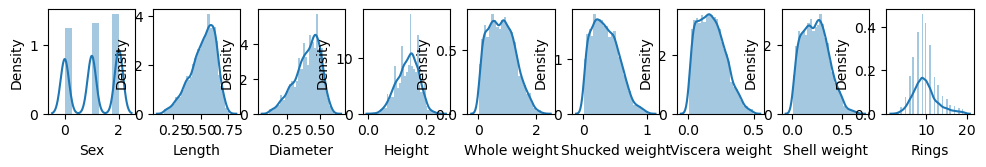

In [38]:
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol, i+1)
    sns.distplot(df_new[collist[i]])

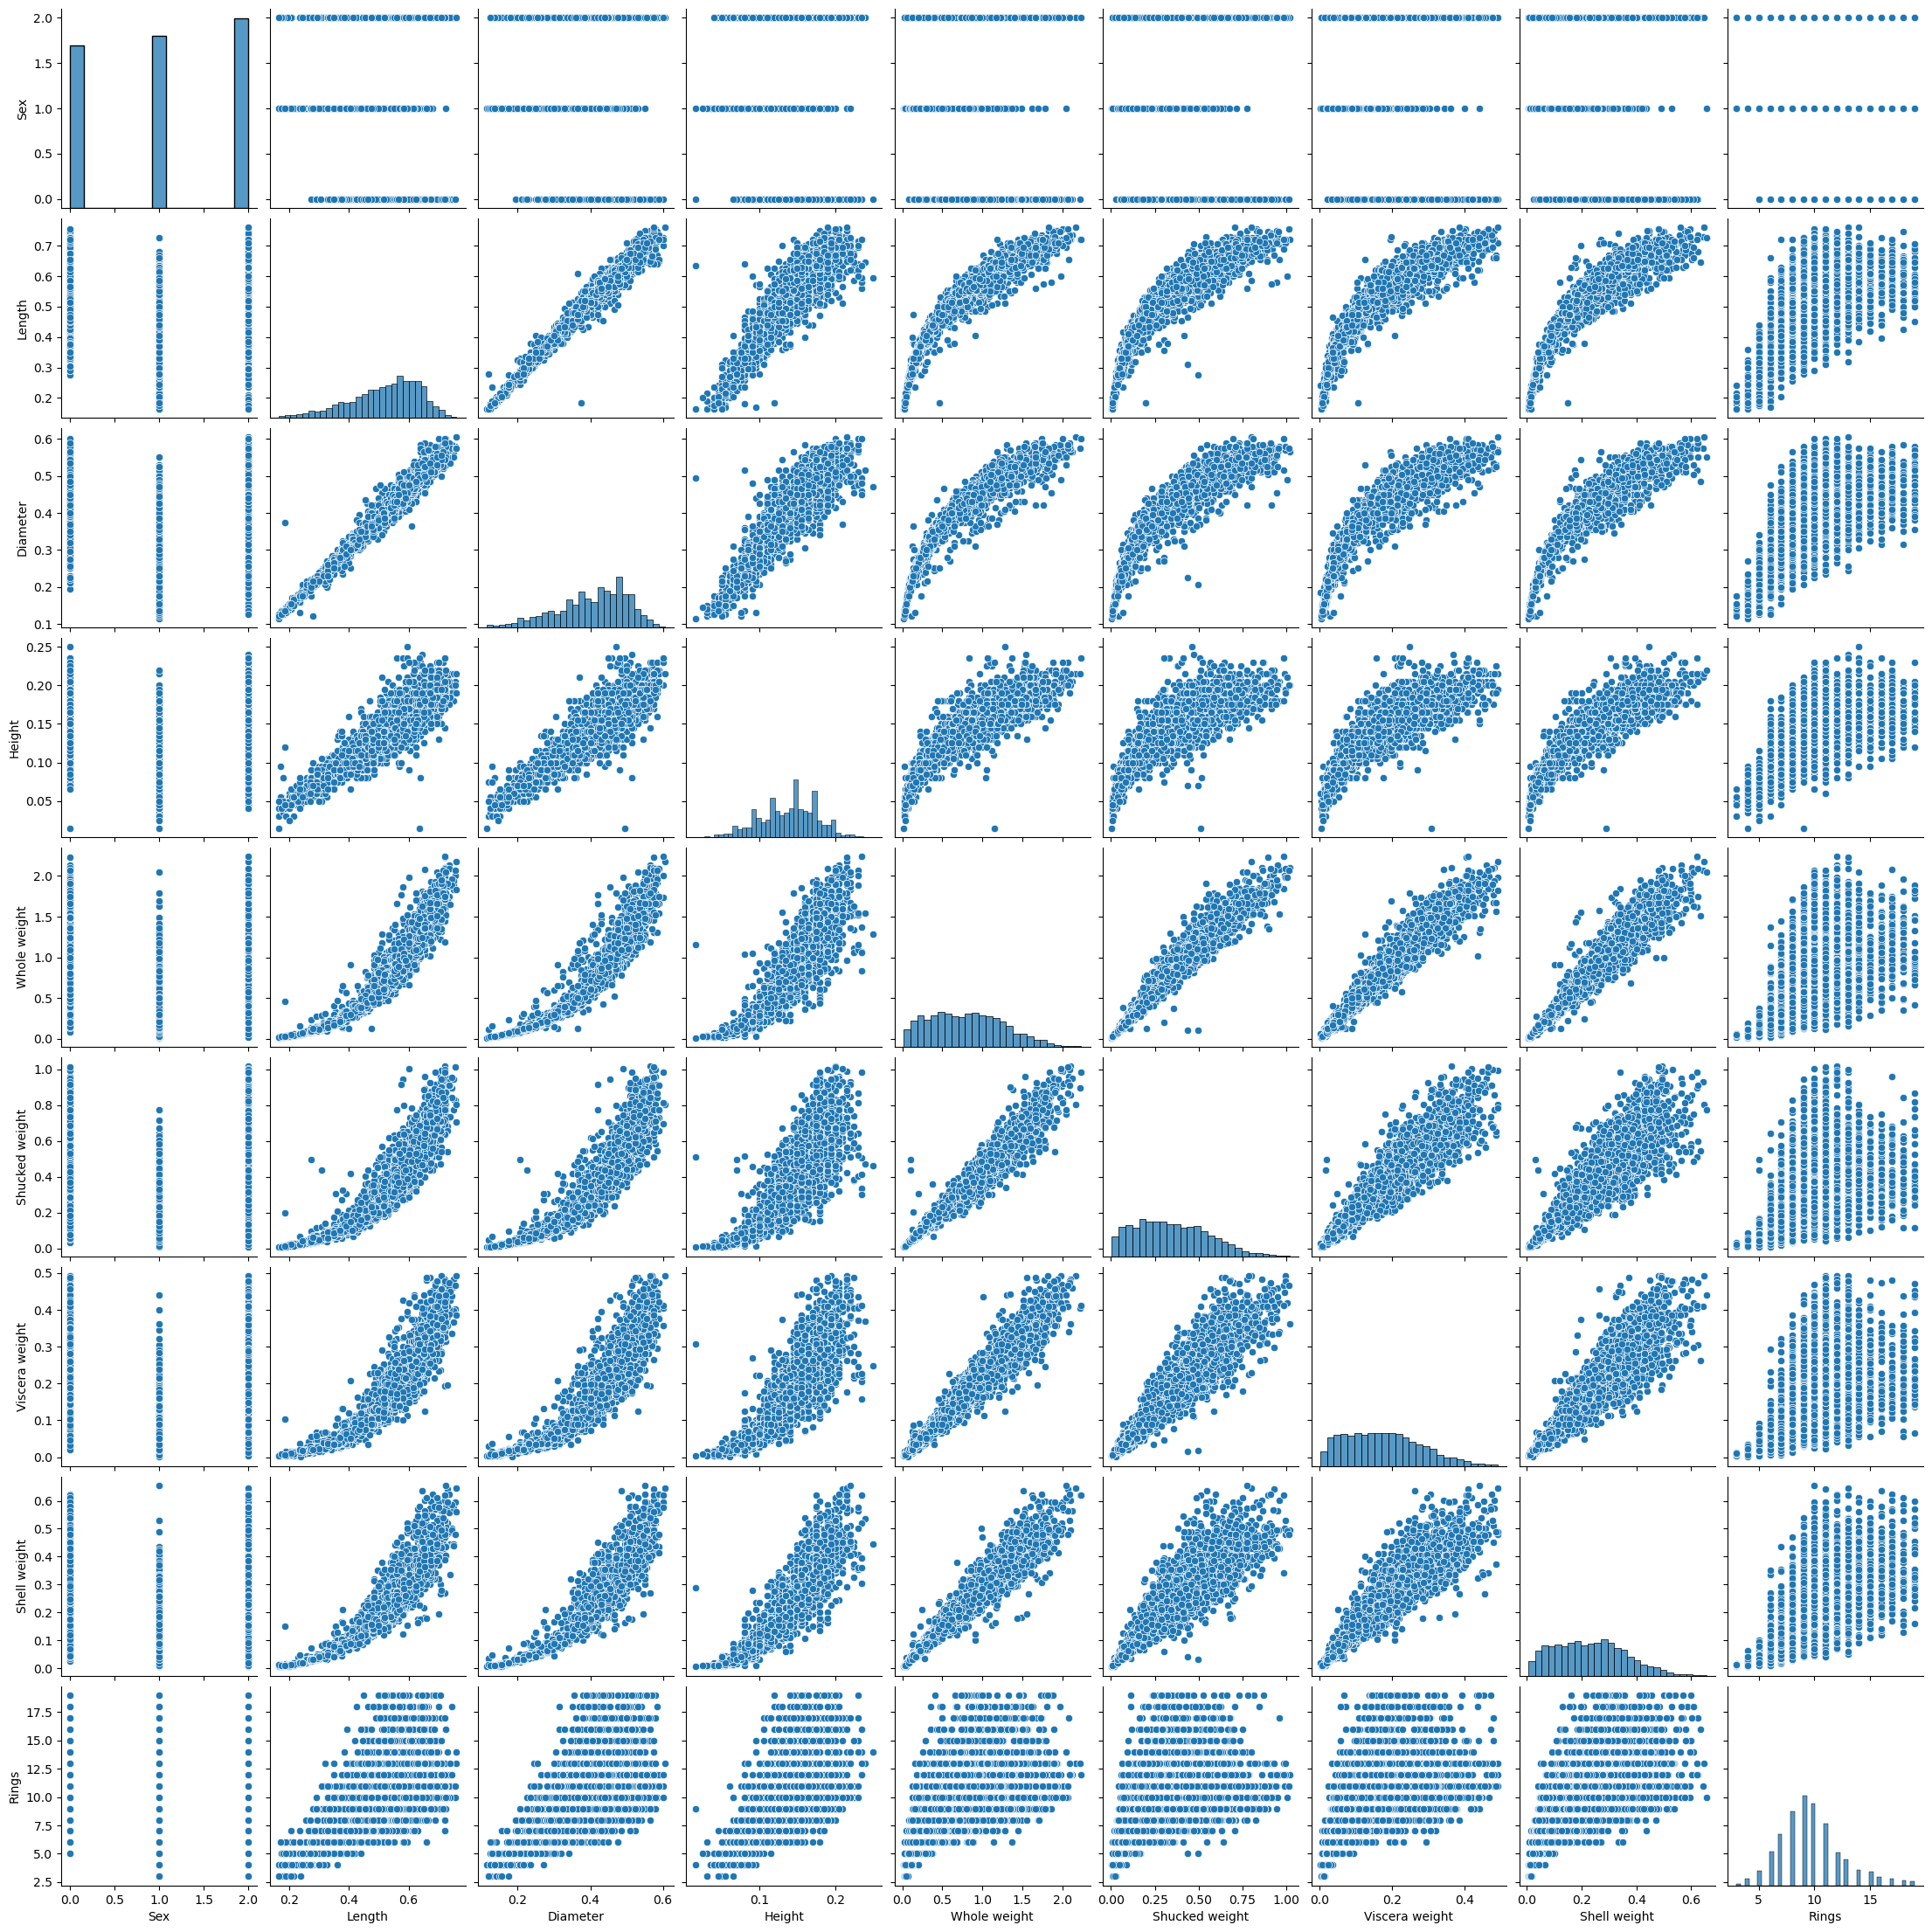

In [39]:
sns.pairplot(df_new)

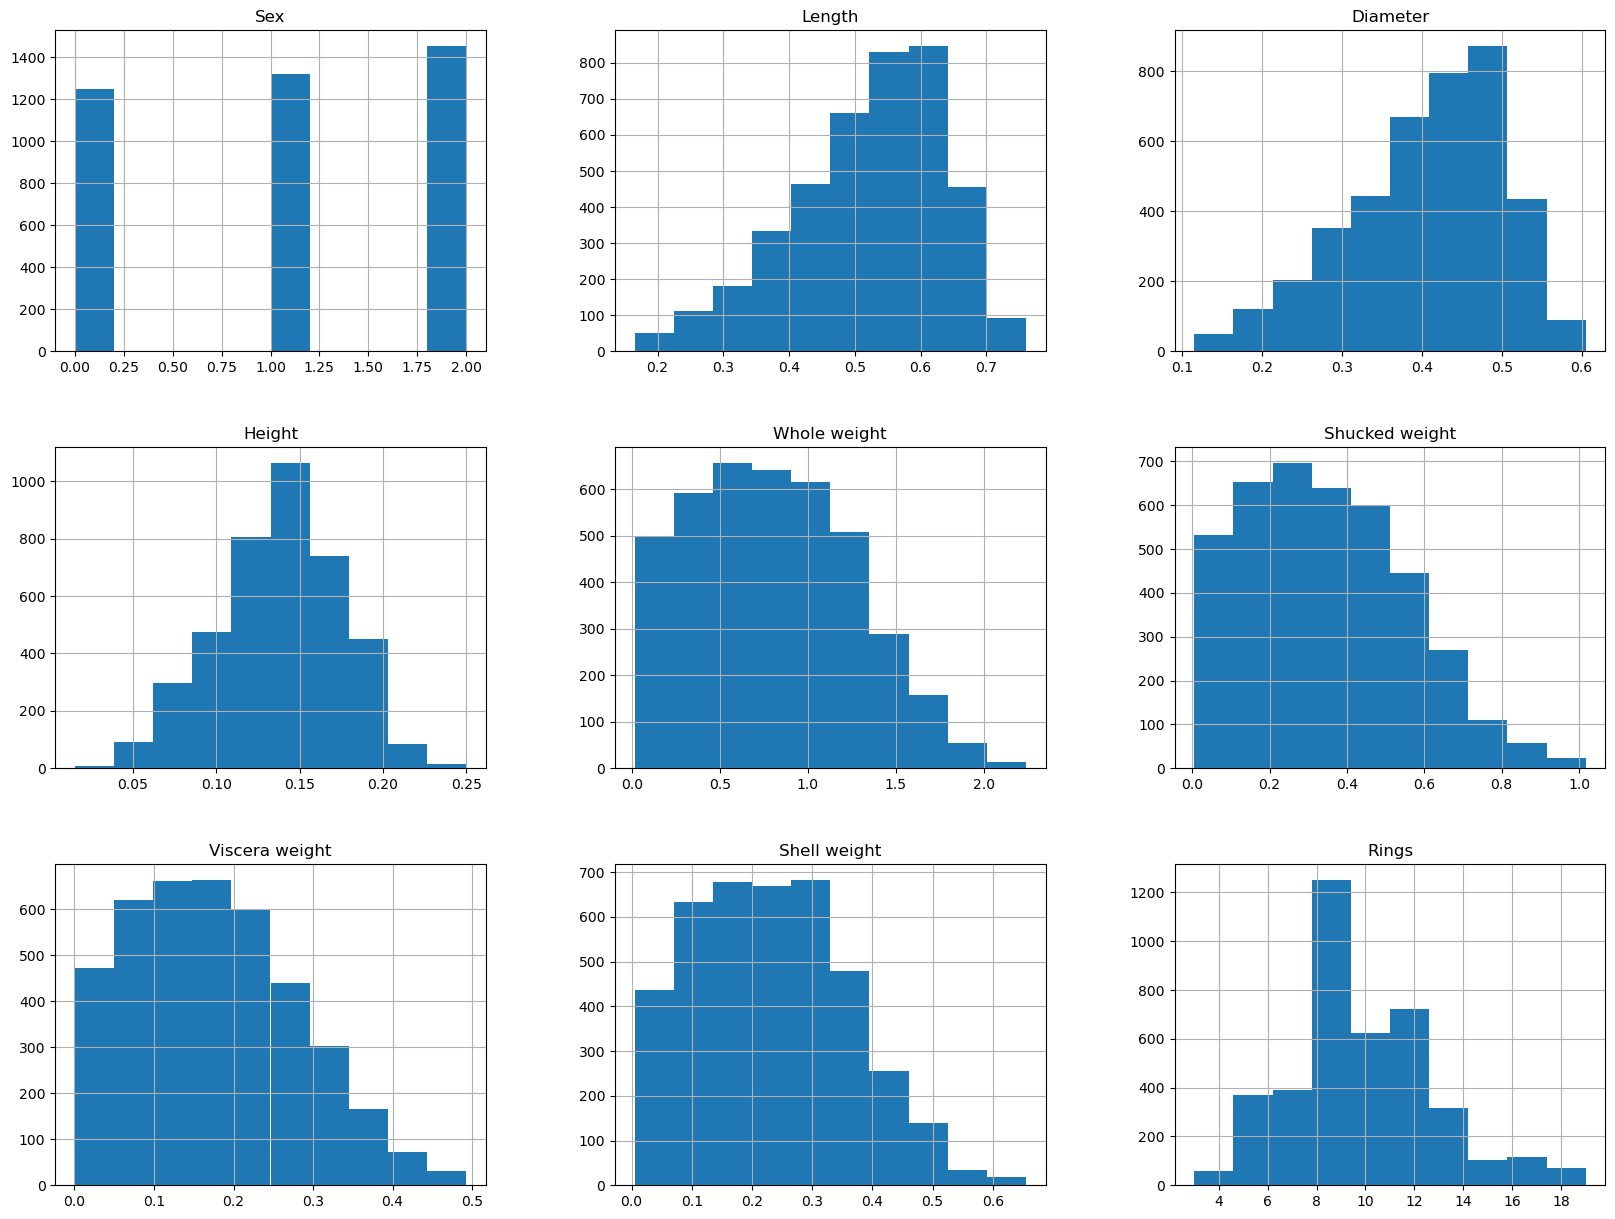

In [40]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df_new.hist(ax=ax)
plt.show()

# Feature Engineering

In [41]:
df_new["age"] = df_new["Rings"] + 1.5
#df.drop("Rings",axis = 1, inplace = True)

In [42]:
df_new.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [43]:
df_1 = df_new.copy()
Age = []
for i in df_1["age"]:
    if i < 9.33:
        Age.append("1")
    if i > 9.33 and i< 18.66 :
        Age.append("2")
    if i > 18.66:
        Age.append("3")
df_1["Age"] = Age
df_1.drop("age" , axis =1,inplace=True)
df_1.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,2
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,2
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,2
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1


In target column multiple value are present and know we are converting into three category i.e. 1,2,3.

# Separate into independent variable and target variable

In [44]:
df_1.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'Age'],
      dtype='object')

In [45]:
x=df_1[['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight']]
dy=df_1['Age']

# Data Scaling

In [46]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
dx=sc.fit_transform(x)
dx=pd.DataFrame(dx,columns=x.columns)
dx

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.159698,-0.569368,-0.420274,-1.166207,-0.633156,-0.603733,-0.723057,-0.630659
1,1.159698,-1.475358,-1.463127,-1.301806,-1.265644,-1.209410,-1.231104,-1.256033
2,-1.285382,0.077768,0.153294,-0.081420,-0.275805,-0.448680,-0.331135,-0.161629
3,1.159698,-0.698795,-0.420274,-0.352617,-0.628771,-0.647342,-0.597255,-0.591574
4,-0.062842,-1.647928,-1.567412,-1.573003,-1.310587,-1.257865,-1.318198,-1.373290
...,...,...,...,...,...,...,...,...
4022,-1.285382,0.379764,0.466150,0.732171,0.184584,0.101275,0.612382,0.143240
4023,1.159698,0.595476,0.361865,-0.081420,0.357779,0.435609,0.375293,0.233138
4024,1.159698,0.681761,0.726863,1.816959,0.818169,0.854737,1.081721,0.604453
4025,-1.285382,0.897473,0.831148,0.325376,0.639493,0.881387,0.825278,0.510647


# Data Imbalance

In [47]:
df_1['Age'].unique()

array(['2', '1', '3'], dtype=object)

<AxesSubplot:xlabel='Age', ylabel='count'>

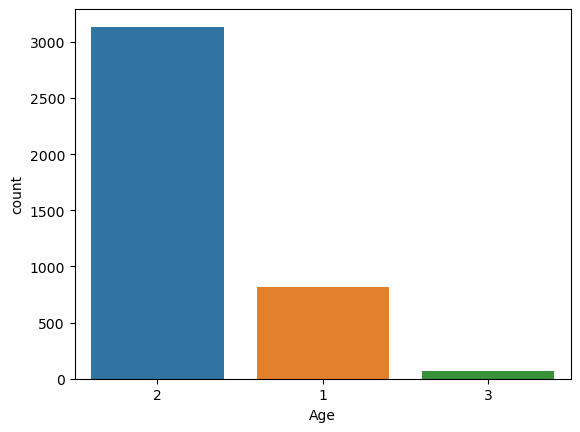

In [48]:
sns.countplot(df_1['Age'])

In [49]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
X, y=SM.fit_resample(x,dy)

In [50]:
X.shape

(9405, 8)

In [51]:
y.shape

(9405,)

# Spliting the all data into X and y for model building

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.33,random_state=42)

In [53]:
X_train.shape

(6301, 8)

In [54]:
y_train.shape

(6301,)

In [55]:
X_test.shape

(3104, 8)

In [56]:
y_test.shape

(3104,)

# Model Building

# Linear Support Vector Classifier

In [57]:

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [58]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train.ravel())
predsvc=clf.predict(X_test)        
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7909149484536082
[[941 102   2]
 [169 628 224]
 [  4 148 886]]
              precision    recall  f1-score   support

           1       0.84      0.90      0.87      1045
           2       0.72      0.62      0.66      1021
           3       0.80      0.85      0.82      1038

    accuracy                           0.79      3104
   macro avg       0.79      0.79      0.79      3104
weighted avg       0.79      0.79      0.79      3104



Linear Support Vector Classifier Algorithm performing very good and the score is 79%

# Decision Tree Classifier

In [59]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy',splitter='best', max_depth=None)
dtc.fit(X_train,y_train)
preddtc=dtc.predict(X_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8753221649484536
[[925 117   3]
 [119 819  83]
 [  3  62 973]]
              precision    recall  f1-score   support

           1       0.88      0.89      0.88      1045
           2       0.82      0.80      0.81      1021
           3       0.92      0.94      0.93      1038

    accuracy                           0.88      3104
   macro avg       0.87      0.87      0.87      3104
weighted avg       0.87      0.88      0.87      3104



Decision Tree Classifier Algorithm performing very good and the score is 87%

# KNeighbors Classifier

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
predknn=knn.predict(X_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8795103092783505
[[ 989   55    1]
 [ 139  719  163]
 [   0   16 1022]]
              precision    recall  f1-score   support

           1       0.88      0.95      0.91      1045
           2       0.91      0.70      0.79      1021
           3       0.86      0.98      0.92      1038

    accuracy                           0.88      3104
   macro avg       0.88      0.88      0.87      3104
weighted avg       0.88      0.88      0.87      3104



KNeighbors Classifier Algorithm performing very good and the score is 87%

# Random Forest Classifier

In [61]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)
predrf=rf.predict(X_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9288015463917526
[[ 983   61    1]
 [  92  889   40]
 [   0   27 1011]]
              precision    recall  f1-score   support

           1       0.91      0.94      0.93      1045
           2       0.91      0.87      0.89      1021
           3       0.96      0.97      0.97      1038

    accuracy                           0.93      3104
   macro avg       0.93      0.93      0.93      3104
weighted avg       0.93      0.93      0.93      3104



Random Forest Classifier Algorithm performing very good and the score is 92%

# Cross Validation

In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
clf=cross_val_score(clf,X,y,cv=5)
print("Cross Validation Score of LinearSVC:",clf.mean())

Cross Validation Score of LinearSVC: 0.7891547049441787


In [64]:
dtc=cross_val_score(dtc,X,y,cv=5)
print("Cross Validation Score of DTC:",dtc.mean())

Cross Validation Score of DTC: 0.8820839978734716


In [65]:
knn=cross_val_score(knn,X,y,cv=5)
print("Cross Validation Score of KNN:",knn.mean())

Cross Validation Score of KNN: 0.8816586921850078


In [66]:
rf=cross_val_score(rf,X,y,cv=5)
print("Cross Validation Score of rf:",rf.mean())

Cross Validation Score of rf: 0.934609250398724


# Hyper parameter tuning

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
from sklearn import datasets
rf = RandomForestClassifier()
grid_parameters = {'criterion':['gini','entropy']}
grid_sr = GridSearchCV(estimator=rf,param_grid=grid_parameters,scoring='accuracy', cv=5)
grid_sr.fit(X_train, y_train)
best_parameters=grid_sr.best_params_
best_result=grid_sr.best_score_
best_model = grid_sr.best_estimator_
print(best_result)
print(best_model)

0.9217601299044598
RandomForestClassifier()


In [69]:
rf=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=42)
rf.fit(X_train,y_train)
predrf=rf.predict(X_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9275128865979382
[[ 981   63    1]
 [  95  887   39]
 [   0   27 1011]]
              precision    recall  f1-score   support

           1       0.91      0.94      0.93      1045
           2       0.91      0.87      0.89      1021
           3       0.96      0.97      0.97      1038

    accuracy                           0.93      3104
   macro avg       0.93      0.93      0.93      3104
weighted avg       0.93      0.93      0.93      3104



After hyper parameter tuning and find best parameter for good score of algorithm. The Random Forest Classifier score is 92%

# Saving Model

In [70]:
import joblib
joblib.dump(rf,'Abalone_Age_23.obj')

['Abalone_Age_23.obj']

# Conclusion

The Random Forest Classifier algorithm performing excellent and AUC Score is 93% approx that is very good score.